# Importing all libraries required in this notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data imported successfully")
dataset.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.shape

(25, 2)

In [7]:
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
print('NO of duplicate rows:',dataset.duplicated().sum())

NO of duplicate rows: 0


#  Plot our data point on 2D graph.

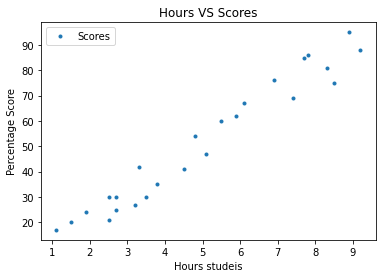

In [9]:
dataset.plot(x='Hours',y='Scores',style= '.')
plt.title('Hours VS Scores')
plt.xlabel('Hours studeis')
plt.ylabel('Percentage Score')
plt.show()

# Preparing the data


In [10]:
X = dataset['Hours'].values
y = dataset['Scores'].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Split the data into train and test sets 
## We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size= .2,random_state=42)

# Fit a line on data points

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Fiting complete.")

Fiting complete.


In [13]:
# The Parameters learned by the model (a,b)
print("a= {} ,b= {}".format(regressor.coef_[0,0],regressor.intercept_[0]))

a= 9.682078154455697 ,b= 2.826892353899737


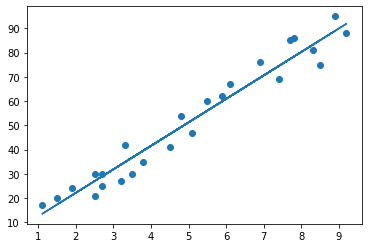

In [14]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()


In [15]:
print(X_test)
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [16]:
print("y   y_pred")
for i,x in enumerate(y_test):
    print("{}  {}".format(x[0],y_pred[i][0]))

y   y_pred
81  83.18814103588203
30  27.03208774003898
21  27.03208774003898
76  69.63323161964405
62  59.951153465188355


In [17]:
print('Model performance:{}'.format(regressor.score(X_test,y_test)))

Model performance:0.9678055545167994


In [18]:
# Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


# What will be predicted score if a student studies 9.25 hour/day?

In [19]:
hours = 9.25
predict_sc = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_sc[0][0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
